In [5]:
#plot a fractal tree - V1
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return ((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)
          

#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)                                
                                 
def drawtree(vsegment, xcoords0, ycoords0, numIters):
    
    if(numIters > 0):
         ox = []
         oy = []
         #first plot the current branch(es)
         ox.append(xcoords0)
         oy.append(ycoords0)
         for i in range(0, len(ox)):
             ax.plot(ox[i],oy[i])
         
         #next transform the branch(es)
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-int(len(xcoords0)/2):])
             y = np.array(ycoords0[-int(len(ycoords0)/2):])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-int(len(xcoords0)/2)])
             y = np.array(ycoords0[0:-int(len(ycoords0)/2)])
             
         z1 = crot2(x + 1j * y, cntr, 2*math.pi /3)
         z2 = crot2(x + 1j * y, cntr, -2*math.pi /3)
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, z2.real, z2.imag, numIters - 1)

drawtree(1, linex, liney, 100) 
                                 


In [6]:
#plot a fractal tree - V2
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return ((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)
          

#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-1.2,1.2)
ax.set_ylim(0,2)                                
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 0):
         ox = []
         oy = []
         #first plot the current branch(es)
         ox.append(xcoords0)
         oy.append(ycoords0)
         for i in range(0, len(ox)):
             ax.plot(ox[i],oy[i])
         
         #next transform the branch(es)
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
             
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)

#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 100) 
                                 


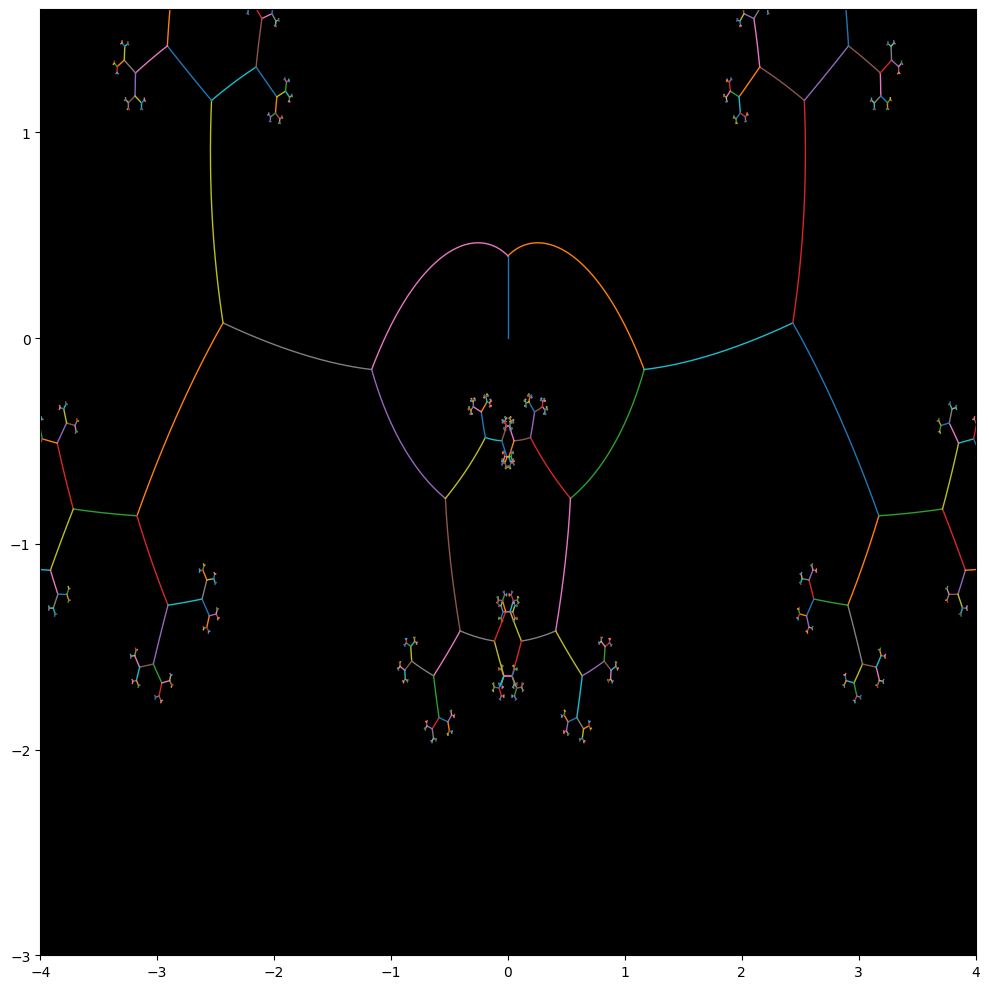

In [19]:
#plot a fractal tree with mobius transform - V3
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.2*(x**5 + x)

#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
z = linex + 1j * liney
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 1.6) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         z = ctransform(lx + 1j * ly)
         for i in range(0, len(z)):
            ax.plot(z[i].real, z[i].imag, linewidth=1)
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, z.real, z.imag, 100)
                                 


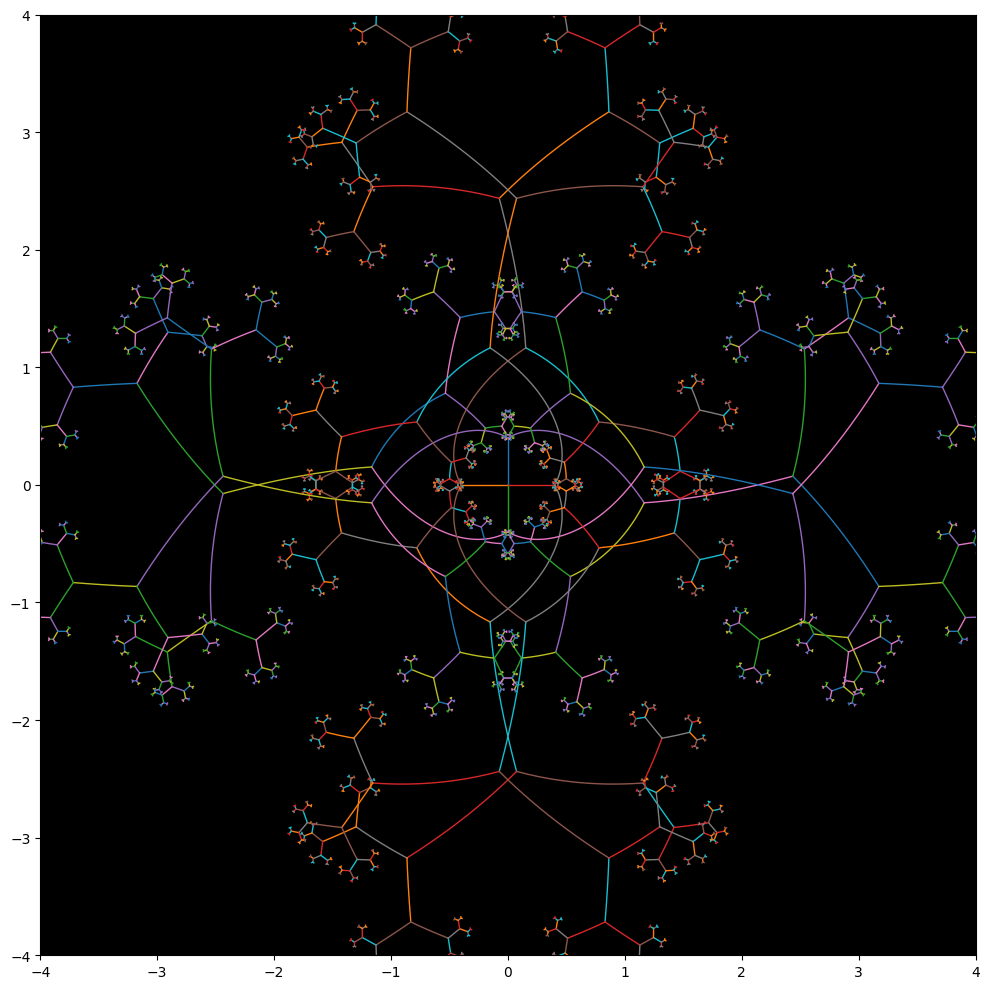

In [20]:
#plot a fractal tree with mobius transform - V4
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.2*(x**5 + x)

#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         for i in range(0, len(z)):
            ax.plot(z[i].real, z[i].imag, linewidth=1)
            ax.plot(z2[i].real, z2[i].imag, linewidth=1)
            ax.plot(z3[i].real, z3[i].imag, linewidth=1)
            ax.plot(z4[i].real, z4[i].imag, linewidth=1)
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 200)
#drawtree(1, 0.62 , 2*math.pi /3, z.real, z.imag, 200)
                                 


In [28]:
#plot a fractal tree with mobius transform - V5
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.2*(x**5 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)
         for i in range(0, len(z)):
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
            
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 200)
                                 


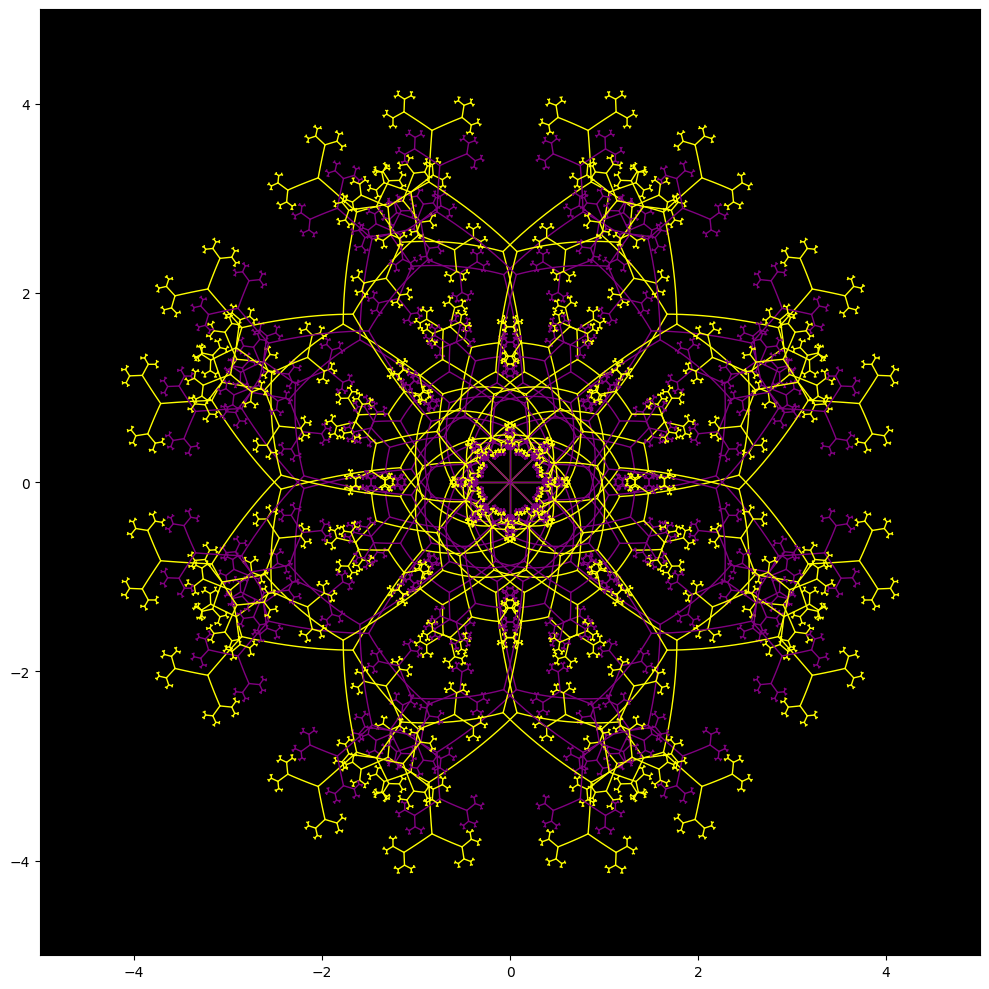

In [1]:
#plot a fractal tree with mobius transform - V6
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.2*(x**5 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

         #we draw two copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(0.9*z[i].real, 0.9*z[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z2[i].real, 0.9*z2[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z3[i].real, 0.9*z3[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z4[i].real, 0.9*z4[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z5[i].real, 0.9*z5[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z6[i].real, 0.9*z6[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z7[i].real, 0.9*z7[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z8[i].real, 0.9*z8[i].imag, linewidth=1, color='purple')
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 200)
                                 


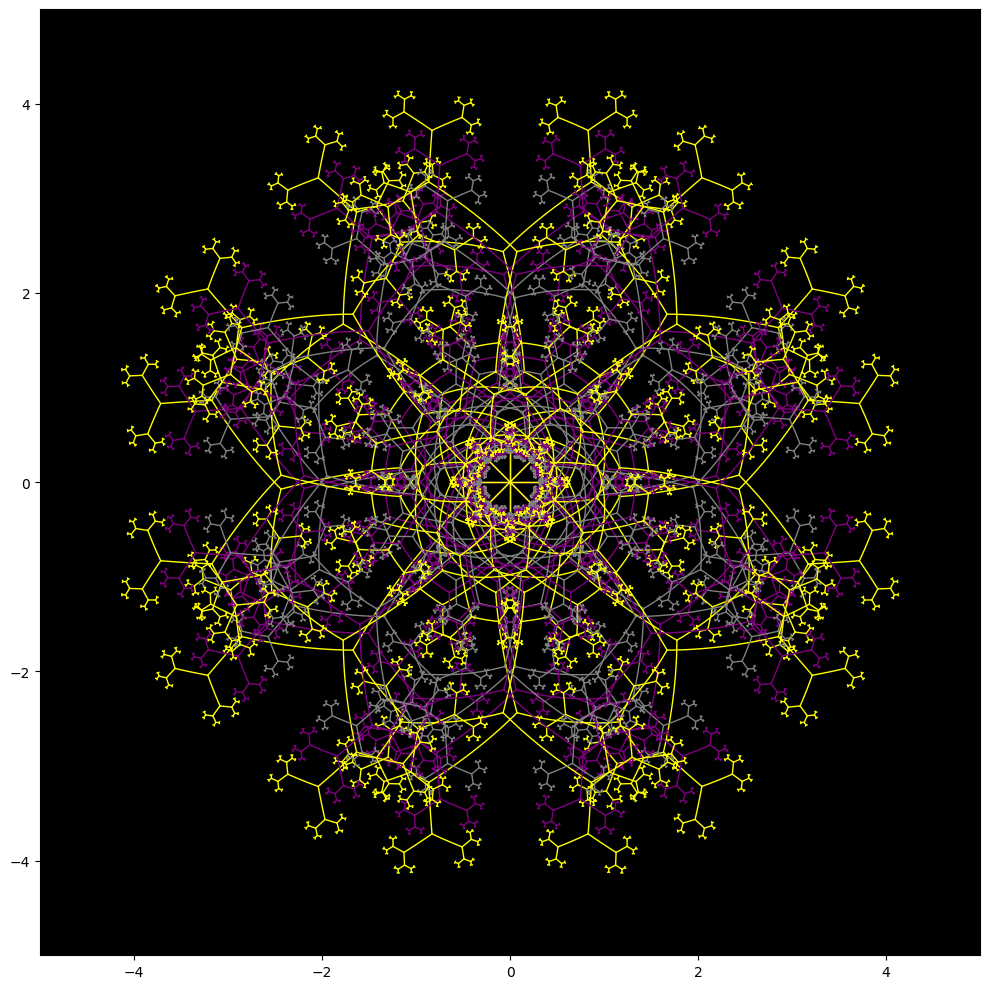

In [2]:
#plot a fractal tree with mobius transform - V7
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.2*(x**5 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(0.8*z[i].real, 0.9*z[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z2[i].real, 0.8*z2[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z3[i].real, 0.8*z3[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z4[i].real, 0.8*z4[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z5[i].real, 0.8*z5[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z6[i].real, 0.8*z6[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z7[i].real, 0.8*z7[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z8[i].real, 0.8*z8[i].imag, linewidth=1, color='gray')
            ax.plot(0.9*z[i].real, 0.9*z[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z2[i].real, 0.9*z2[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z3[i].real, 0.9*z3[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z4[i].real, 0.9*z4[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z5[i].real, 0.9*z5[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z6[i].real, 0.9*z6[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z7[i].real, 0.9*z7[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z8[i].real, 0.9*z8[i].imag, linewidth=1, color='purple')
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 200)
                                 


In [1]:
#plot a fractal tree with mobius transform - V8
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.07*(x**7 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(0.8*z[i].real, 0.8*z[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z2[i].real, 0.8*z2[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z3[i].real, 0.8*z3[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z4[i].real, 0.8*z4[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z5[i].real, 0.8*z5[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z6[i].real, 0.8*z6[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z7[i].real, 0.8*z7[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z8[i].real, 0.8*z8[i].imag, linewidth=1, color='gray')
            ax.plot(0.9*z[i].real, 0.9*z[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z2[i].real, 0.9*z2[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z3[i].real, 0.9*z3[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z4[i].real, 0.9*z4[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z5[i].real, 0.9*z5[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z6[i].real, 0.9*z6[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z7[i].real, 0.9*z7[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z8[i].real, 0.9*z8[i].imag, linewidth=1, color='purple')
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 200)
                                 


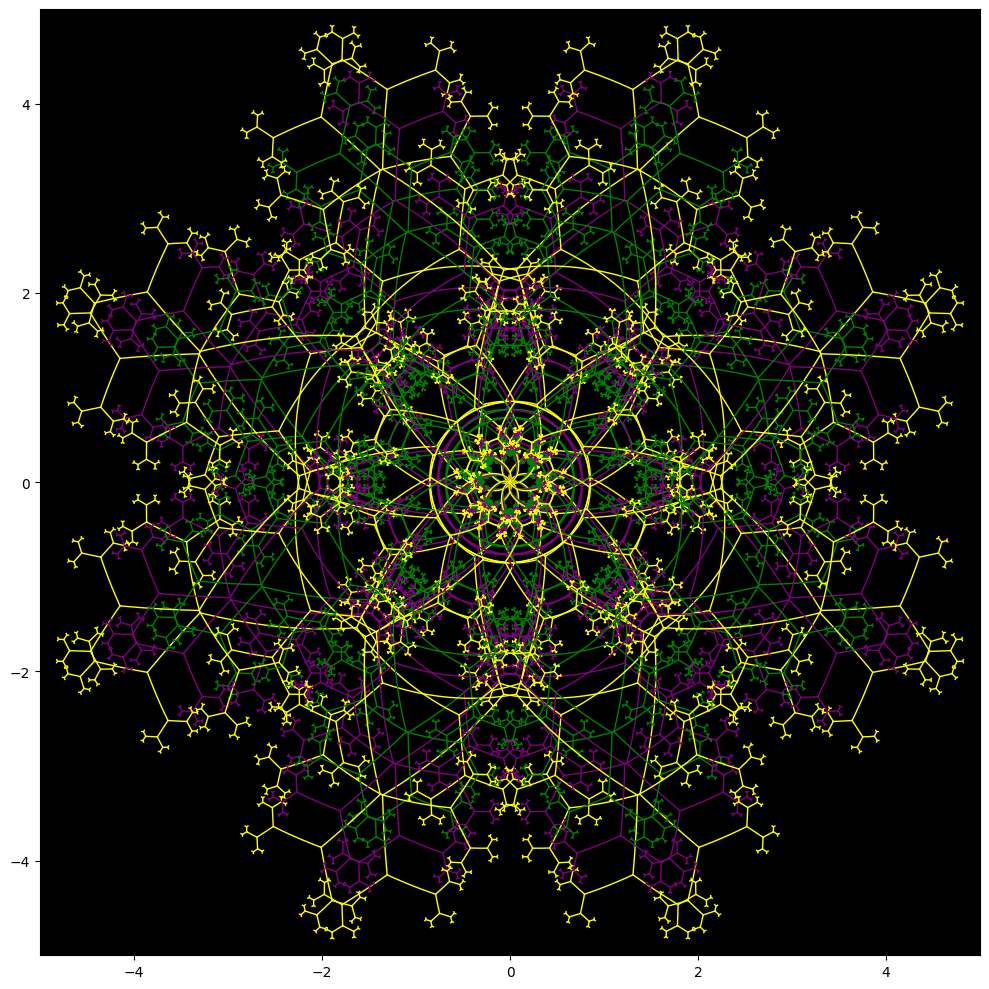

In [8]:
#plot a fractal tree with mobius transform - V9
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.07*(x**7 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(0.8*z[i].real, 0.8*z[i].imag, linewidth=1, color='green')
            ax.plot(0.8*z2[i].real, 0.8*z2[i].imag, linewidth=1, color='green')
            ax.plot(0.8*z3[i].real, 0.8*z3[i].imag, linewidth=1, color='green')
            ax.plot(0.8*z4[i].real, 0.8*z4[i].imag, linewidth=1, color='green')
            ax.plot(0.8*z5[i].real, 0.8*z5[i].imag, linewidth=1, color='green')
            ax.plot(0.8*z6[i].real, 0.8*z6[i].imag, linewidth=1, color='green')
            ax.plot(0.8*z7[i].real, 0.8*z7[i].imag, linewidth=1, color='green')
            ax.plot(0.8*z8[i].real, 0.8*z8[i].imag, linewidth=1, color='green')
            ax.plot(0.9*z[i].real, 0.9*z[i].imag, linewidth=1, color='green')
            ax.plot(0.9*z2[i].real, 0.9*z2[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z3[i].real, 0.9*z3[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z4[i].real, 0.9*z4[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z5[i].real, 0.9*z5[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z6[i].real, 0.9*z6[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z7[i].real, 0.9*z7[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z8[i].real, 0.9*z8[i].imag, linewidth=1, color='purple')
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 200)
                                 


In [1]:
#plot a fractal tree with mobius transform - V9
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 100

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.07*(x**7 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(0.8*z[i].real, 0.8*z[i].imag, linewidth=1, color='yellow')
            ax.plot(0.8*z2[i].real, 0.8*z2[i].imag, linewidth=1, color='yellow')
            ax.plot(0.8*z3[i].real, 0.8*z3[i].imag, linewidth=1, color='yellow')
            ax.plot(0.8*z4[i].real, 0.8*z4[i].imag, linewidth=1, color='yellow')
            ax.plot(0.8*z5[i].real, 0.8*z5[i].imag, linewidth=1, color='yellow')
            ax.plot(0.8*z6[i].real, 0.8*z6[i].imag, linewidth=1, color='yellow')
            ax.plot(0.8*z7[i].real, 0.8*z7[i].imag, linewidth=1, color='yellow')
            ax.plot(0.8*z8[i].real, 0.8*z8[i].imag, linewidth=1, color='yellow')
            ax.plot(0.9*z[i].real, 0.9*z[i].imag, linewidth=1, color='yellow')
            ax.plot(0.9*z2[i].real, 0.9*z2[i].imag, linewidth=1, color='yellow')
            ax.plot(0.9*z3[i].real, 0.9*z3[i].imag, linewidth=1, color='yellow')
            ax.plot(0.9*z4[i].real, 0.9*z4[i].imag, linewidth=1, color='yellow')
            ax.plot(0.9*z5[i].real, 0.9*z5[i].imag, linewidth=1, color='yellow')
            ax.plot(0.9*z6[i].real, 0.9*z6[i].imag, linewidth=1, color='yellow')
            ax.plot(0.9*z7[i].real, 0.9*z7[i].imag, linewidth=1, color='yellow')
            ax.plot(0.9*z8[i].real, 0.9*z8[i].imag, linewidth=1, color='yellow')
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 40)
                                 


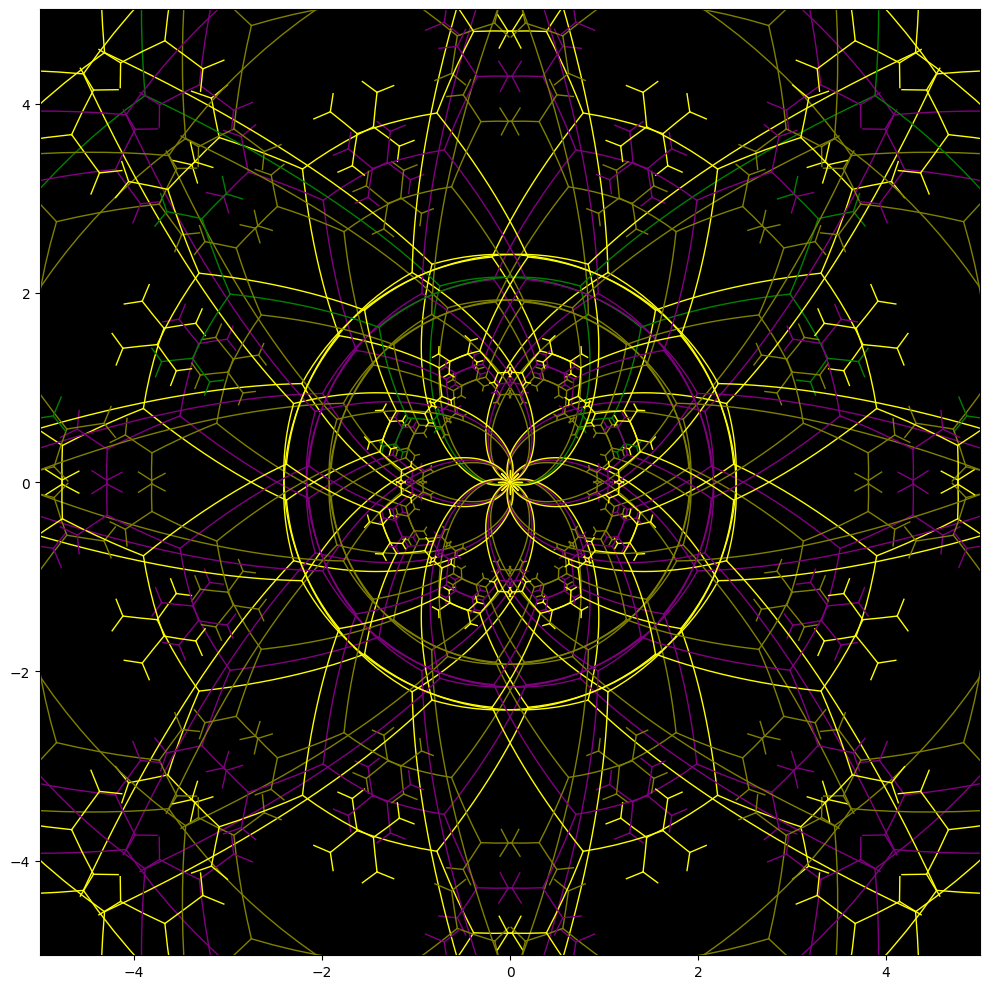

In [2]:
#plot a fractal tree with mobius transform - V10
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 100

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.2*(x**7 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(0.8*z[i].real, 0.8*z[i].imag, linewidth=1, color='olive')
            ax.plot(0.8*z2[i].real, 0.8*z2[i].imag, linewidth=1, color='olive')
            ax.plot(0.8*z3[i].real, 0.8*z3[i].imag, linewidth=1, color='olive')
            ax.plot(0.8*z4[i].real, 0.8*z4[i].imag, linewidth=1, color='olive')
            ax.plot(0.8*z5[i].real, 0.8*z5[i].imag, linewidth=1, color='olive')
            ax.plot(0.8*z6[i].real, 0.8*z6[i].imag, linewidth=1, color='olive')
            ax.plot(0.8*z7[i].real, 0.8*z7[i].imag, linewidth=1, color='olive')
            ax.plot(0.8*z8[i].real, 0.8*z8[i].imag, linewidth=1, color='olive')
            ax.plot(0.9*z[i].real, 0.9*z[i].imag, linewidth=1, color='green')
            ax.plot(0.9*z2[i].real, 0.9*z2[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z3[i].real, 0.9*z3[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z4[i].real, 0.9*z4[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z5[i].real, 0.9*z5[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z6[i].real, 0.9*z6[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z7[i].real, 0.9*z7[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z8[i].real, 0.9*z8[i].imag, linewidth=1, color='purple')
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 40)
                                 


Theseexperiments show that the "sweet spot" is reached between degree = 5 and 7 for the mobius polynomial ctransform.

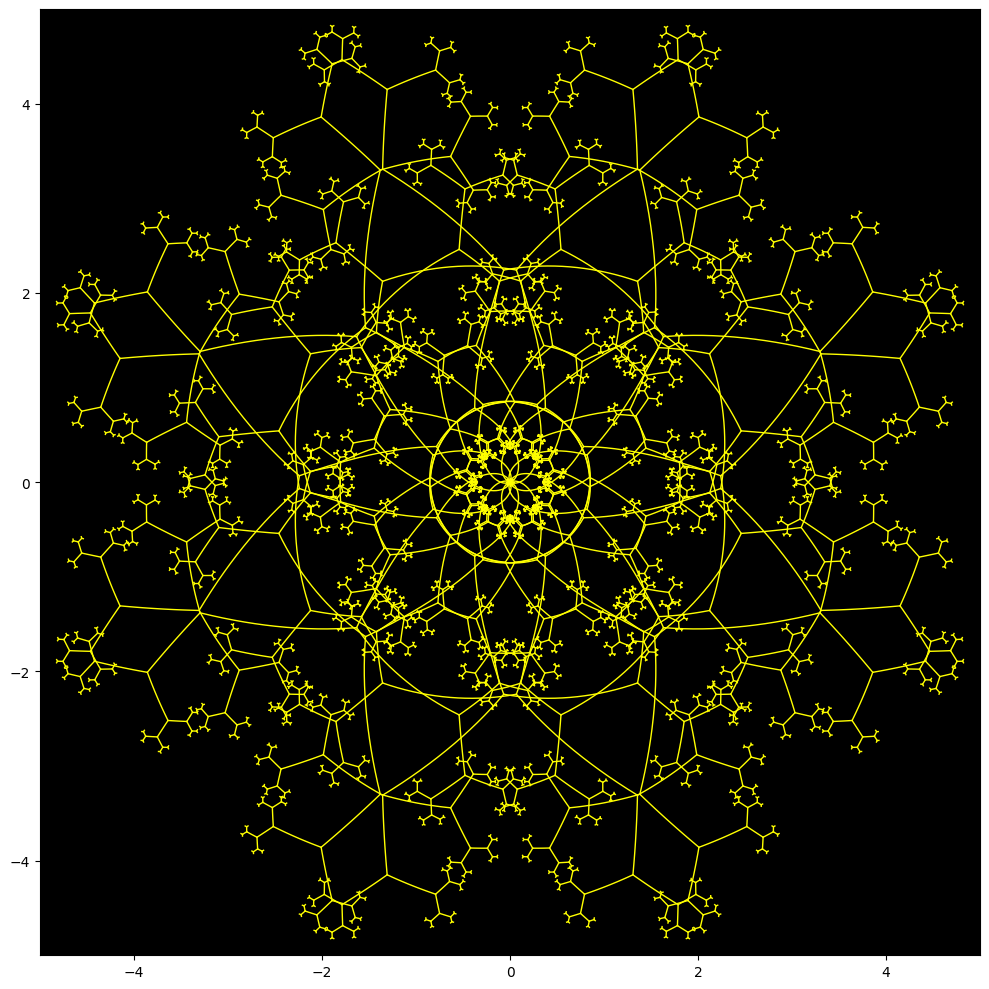

In [1]:
#plot a fractal tree with mobius transform - V11
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.07*(x**7 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 100)
                                 


In [4]:
#plot a fractal tree with mobius transform - V11
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.02*(x**9 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 100)
                                 


In [2]:
#plot a fractal tree with mobius transform - V8
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.07*(x**7 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(0.8*z[i].real, 0.8*z[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z2[i].real, 0.8*z2[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z3[i].real, 0.8*z3[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z4[i].real, 0.8*z4[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z5[i].real, 0.8*z5[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z6[i].real, 0.8*z6[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z7[i].real, 0.8*z7[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z8[i].real, 0.8*z8[i].imag, linewidth=1, color='gray')
            ax.plot(0.9*z[i].real, 0.9*z[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z2[i].real, 0.9*z2[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z3[i].real, 0.9*z3[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z4[i].real, 0.9*z4[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z5[i].real, 0.9*z5[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z6[i].real, 0.9*z6[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z7[i].real, 0.9*z7[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z8[i].real, 0.9*z8[i].imag, linewidth=2, color='purple')
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 100)

In [4]:
#plot a fractal tree with mobius transform - V8
import numpy as np
import matplotlib.pyplot as plt
import cmath, math

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True

#number of points in an initial element
N = 1000

#isometries
#rotate z around origin by angle a
def crot(x, angle):
    return cmath.exp(1j * angle) * x

#rotate z around z0 by angle a
def crot2(z, z0, a):
    return  crot(z - z0, a) + z0
    
#dilate/contract z by factor r with respect to z0 
def dilate(z, z0, r):
    return (r + 1j * 0)*(z - z0) + z0

#translate z by z0
def translate(z, z0):
    return z + z0

#midpoint
def midpt(z1, z2):
    return .01*((z1.real + z2.real)/2) + 1j * ((z1.imag + z2.imag)/2)

#mobius transformation
def ctransform(x):
    return 0.2*(x**5 + x)


#create the initial stage - vertical unit segment thru O
t = np.linspace(0, 1, N)
linex = np.array([0 for x in t])
liney = np.array([x for x in t])
         
#initialize plot area
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5) 
ax.set_facecolor('black')
                                 
def drawtree(vsegment, shrink, angle, xcoords0, ycoords0, numIters):
    
    if(numIters > 1):   
         #first plot the current branch(es)
         ox = []
         oy = []
         ox.append(xcoords0)
         oy.append(ycoords0)
         lx = np.array(ox)
         ly = np.array(oy)

         #the pattern is rotated for 8-fold symmetry
         z = ctransform(lx + 1j * ly)
         z2 = crot2(z, 0 + 1j * 0, math.pi/2)
         z3 = crot2(z, 0 + 1j * 0, math.pi)
         z4 = crot2(z, 0 + 1j * 0, 3*math.pi/2)
         z5 = crot2(z, 0 + 1j * 0, math.pi/4)
         z6 = crot2(z, 0 + 1j * 0, 3*math.pi/4)
         z7 = crot2(z, 0 + 1j * 0, 5*math.pi/4)
         z8 = crot2(z, 0 + 1j * 0, 7*math.pi/4)

        #we draw three copies of the pattern, of different sizes and colors
        #for a perspective effect
         for i in range(0, len(z)):
            ax.plot(0.8*z[i].real, 0.8*z[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z2[i].real, 0.8*z2[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z3[i].real, 0.8*z3[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z4[i].real, 0.8*z4[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z5[i].real, 0.8*z5[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z6[i].real, 0.8*z6[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z7[i].real, 0.8*z7[i].imag, linewidth=1, color='gray')
            ax.plot(0.8*z8[i].real, 0.8*z8[i].imag, linewidth=1, color='gray')
            ax.plot(0.9*z[i].real, 0.9*z[i].imag, linewidth=1, color='purple')
            ax.plot(0.9*z2[i].real, 0.9*z2[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z3[i].real, 0.9*z3[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z4[i].real, 0.9*z4[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z5[i].real, 0.9*z5[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z6[i].real, 0.9*z6[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z7[i].real, 0.9*z7[i].imag, linewidth=2, color='purple')
            ax.plot(0.9*z8[i].real, 0.9*z8[i].imag, linewidth=2, color='purple')
            ax.plot(z[i].real, z[i].imag, linewidth=1, color='yellow')
            ax.plot(z2[i].real, z2[i].imag, linewidth=1, color='yellow')
            ax.plot(z3[i].real, z3[i].imag, linewidth=1, color='yellow')
            ax.plot(z4[i].real, z4[i].imag, linewidth=1, color='yellow')
            ax.plot(z5[i].real, z5[i].imag, linewidth=1, color='yellow')
            ax.plot(z6[i].real, z6[i].imag, linewidth=1, color='yellow')
            ax.plot(z7[i].real, z7[i].imag, linewidth=1, color='yellow')
            ax.plot(z8[i].real, z8[i].imag, linewidth=1, color='yellow')
        
         
         #next transform the current branch(es) to get the next stage branches
         #take the second/first half of each branch and rotate anti/clock-wise about last point
         #then plot in the next iteration by calling drawtree recursively
         if (len(xcoords0) < 1):
             return
            
         contractd = int(shrink * len(xcoords0))
         if (vsegment == 1):
             cntr = xcoords0[len(xcoords0)-1] + 1j*ycoords0[len(xcoords0)-1]
             x = np.array(xcoords0[-contractd:])
             y = np.array(ycoords0[-contractd:])
         else:
             cntr = xcoords0[0] + 1j*ycoords0[0]
             x = np.array(xcoords0[0:-contractd])
             y = np.array(ycoords0[0:-contractd])
                
         z1 = crot2(x + 1j * y, cntr, angle)
         z2 = crot2(x + 1j * y, cntr, -angle)
        
         #reverse the parity of indicator vsegment
         vsegment= abs(vsegment - 1)
         drawtree(vsegment, shrink, angle, z1.real, z1.imag, numIters - 1)
         drawtree(vsegment, shrink, angle, z2.real, z2.imag, numIters - 1)
    
#shrink here is the golden ratio (sqrt(5)-1)/2 to grow a lush tree
drawtree(1, 0.62 , 2*math.pi /3, linex, liney, 100)